<a href="https://colab.research.google.com/github/ezzatmostafa96/Action-Recognition-in-Real-Time/blob/master/30MayPostProcessing_VGG16_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/My\ Drive/er1.zip -d /content
!unzip /content/drive/My\ Drive/er2.zip -d /content
!unzip /content/drive/My\ Drive/er3.zip -d /content

Archive:  /content/drive/My Drive/er1.zip
   creating: /content/content/Normal/test/
  inflating: /content/content/Normal/test/D_Normal_Videos_722_x264-401.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-393.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_634_x264-197.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-6114.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_696_x264-150.jpg  
  inflating: /content/content/Normal/test/B_Fighting041_x264-2084.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-10629.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_722_x264-418.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-6259.jpg  
  inflating: /content/content/Normal/test/B_Fighting025_x264-375.jpg  
  inflating: /content/content/Normal/test/B_Fighting024_x264-170.jpg  
  inflating: /content/content/Normal/test/B_Fighting025_x264-262.jpg  
  inflating: /content/content/

In [ ]:
import os
path = '/content/content/Normal/test'
files = os.listdir(path)
files

['C_Shooting032_x264-1189.jpg',
 'B_Fighting004_x264-316.jpg',
 'C_Shooting052_x264-483.jpg',
 'B_Fighting022_x264-67.jpg',
 'D_Normal_Videos_365_x264-556.jpg',
 'D_Normal_Videos_401_x264-9.jpg',
 'B_Fighting050_x264-1377.jpg',
 'D_Normal_Videos_781_x264-288.jpg',
 'A_Explosion046_x264-1423.jpg',
 'B_Fighting041_x264-2366.jpg',
 'D_Normal_Videos_621_x264-307.jpg',
 'C_Shooting018_x264-35.jpg',
 'A_Explosion046_x264-10296.jpg',
 'D_Normal_Videos_576_x264-1020.jpg',
 'D_Normal_Videos_576_x264-1120.jpg',
 'C_Shooting019_x264-126.jpg',
 'C_Shooting015_x264-57.jpg',
 'D_Normal_Videos_352_x264-211.jpg',
 'A_Explosion020_x264-93.jpg',
 'D_Normal_Videos_576_x264-798.jpg',
 'A_Explosion046_x264-9038.jpg',
 'D_Normal_Videos_247_x264-179.jpg',
 'D_Normal_Videos_576_x264-1117.jpg',
 'D_Normal_Videos_050_x264-80.jpg',
 'D_Normal_Videos_912_x264-47.jpg',
 'D_Normal_Videos_100_x264-17.jpg',
 'B_Fighting041_x264-2795.jpg',
 'D_Normal_Videos_722_x264-235.jpg',
 'C_Shooting026_x264-123.jpg',
 'D_Normal_

In [ ]:
files[0][0]

'C'

In [ ]:
import os

paths = (os.path.join(root, filename)
        for root, _, filenames in os.walk('/content/content/Normal')
        for filename in filenames)

for path in paths:
    # the '#' in the example below will be replaced by the '-' in the filenames in the directory
    newname = path.replace('C', 'A')
    if newname != path:
        os.rename(path, newname)

import os

paths = (os.path.join(root, filename)
        for root, _, filenames in os.walk('/content/content/Normal')
        for filename in filenames)

for path in paths:
    # the '#' in the example below will be replaced by the '-' in the filenames in the directory
    newname = path.replace('B', 'A')
    if newname != path:
        os.rename(path, newname)




In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import save_img
##########################################################

path_train = "/content/content/Normal/train"
frames = os.listdir(path_train)
target_labels =[]
for i in frames:
  if i.split('_')[0] == 'A':
    target_labels.append(0)
  elif i.split('_')[0] == 'D':
    target_labels.append(1)
  
        
path_test = "/content/content/Normal/test"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

path_validate = "/content/content/Normal/val"
framesval = os.listdir(path_validate)
val_labels =[]
for i in framesval:
  if i.split('_')[0] == 'A':
    val_labels.append(0)
  elif i.split('_')[0] == 'D':
    val_labels.append(1)
  ##########################################################

path_validate = "/content/content/Normal/train"
framesval = (os.listdir(path_validate))
len(framesval)

df = pd.DataFrame(target_labels)
pd.value_counts(df.values.flatten())


0    1400
1     800
dtype: int64

In [ ]:
os.listdir(path_validate)

['A_Explosion030_x264-13.jpg',
 'A_Shooting033_x264-199.jpg',
 'A_Explosion046_x264-13137.jpg',
 'A_Explosion046_x264-9436.jpg',
 'A_Fighting022_x264-204.jpg',
 'D_Normal_Videos_634_x264-973.jpg',
 'A_Shooting009_x264-146.jpg',
 'A_Explosion013_x264-140.jpg',
 'A_Explosion004_x264-160.jpg',
 'A_Shooting042_x264-90.jpg',
 'A_Shooting036_x264-113.jpg',
 'A_Shooting042_x264-35.jpg',
 'D_Normal_Videos_352_x264-489.jpg',
 'D_Normal_Videos_634_x264-492.jpg',
 'D_Normal_Videos_050_x264-121.jpg',
 'D_Normal_Videos_696_x264-50.jpg',
 'A_Shooting032_x264-1940.jpg',
 'D_Normal_Videos_576_x264-296.jpg',
 'A_Explosion007_x264-1246.jpg',
 'A_Fighting004_x264-294.jpg',
 'D_Normal_Videos_439_x264-218.jpg',
 'A_Shooting014_x264-31.jpg',
 'A_Explosion043_x264-551.jpg',
 'A_Shooting014_x264-458.jpg',
 'A_Fighting006_x264-77.jpg',
 'A_Fighting015_x264-407.jpg',
 'A_Shooting031_x264-161.jpg',
 'D_Normal_Videos_247_x264-283.jpg',
 'D_Normal_Videos_312_x264-35.jpg',
 'A_Explosion046_x264-1000.jpg',
 'D_Norma

In [ ]:
path_validate = "/content/content/Normal/test"
framesval = (os.listdir(path_validate))
len(framesval)
df = pd.DataFrame(test_labels)
pd.value_counts(df.values.flatten())

path_validate = "/content/content/Normal/test"
framesval = (os.listdir(path_validate))
len(framesval)
df = pd.DataFrame(val_labels)
pd.value_counts(df.values.flatten())



0    300
1    150
dtype: int64

In [ ]:
import glob
import numpy as np
import os
import shutil

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline


images = glob.glob('/content/content/Normal/train/*')
print(images)


train_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
train_data /= 255

array_to_img(train_data[434])

images = glob.glob('/content/content/Normal/test/*')
print(images)
print(len(images))

test_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
test_data /= 255


array_to_img(test_data[5])

images = glob.glob('/content/content/Normal/val/*')
print(images)
print(len(images))

val_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
val_data /= 255


array_to_img(val_data[5])

print("Train shape: ", train_data.shape)
print("Test shape: ", test_data.shape)
print("validate shape: ", val_data.shape)
val_labels = np.array(val_labels)
target_labels = np.array(target_labels)
test_labels = np.array(test_labels)
print(val_labels.shape)
print(test_labels.shape)
print(target_labels.shape)
from keras.utils.np_utils import to_categorical
train_label = to_categorical(target_labels)
test_label = to_categorical(test_labels)
val_label = to_categorical(val_labels)
print(val_label.shape)
print(test_label.shape)
print(train_label.shape)

from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense



['/content/content/Normal/train/A_Explosion030_x264-13.jpg', '/content/content/Normal/train/A_Shooting033_x264-199.jpg', '/content/content/Normal/train/A_Explosion046_x264-13137.jpg', '/content/content/Normal/train/A_Explosion046_x264-9436.jpg', '/content/content/Normal/train/A_Fighting022_x264-204.jpg', '/content/content/Normal/train/D_Normal_Videos_634_x264-973.jpg', '/content/content/Normal/train/A_Shooting009_x264-146.jpg', '/content/content/Normal/train/A_Explosion013_x264-140.jpg', '/content/content/Normal/train/A_Explosion004_x264-160.jpg', '/content/content/Normal/train/A_Shooting042_x264-90.jpg', '/content/content/Normal/train/A_Shooting036_x264-113.jpg', '/content/content/Normal/train/A_Shooting042_x264-35.jpg', '/content/content/Normal/train/D_Normal_Videos_352_x264-489.jpg', '/content/content/Normal/train/D_Normal_Videos_634_x264-492.jpg', '/content/content/Normal/train/D_Normal_Videos_050_x264-121.jpg', '/content/content/Normal/train/D_Normal_Videos_696_x264-50.jpg', '/con

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

!pip install efficientnet
import efficientnet.keras as efn 

base_inception = VGG16(weights='imagenet', include_top=False, 
                             input_shape=(300,300,3)) 
base_inception.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
______________________________________________________________

In [ ]:
X_train = base_inception.predict(train_data)
X_train.shape
X_test = base_inception.predict(test_data)
X_test.shape
X_val = base_inception.predict(val_data)
X_val.shape

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2200, 9, 9, 512)
(450, 9, 9, 512)
(450, 9, 9, 512)


In [ ]:
X_train = X_train.reshape(2200, 9 * 9, 512)
X_test = X_test.reshape(450,9 * 9, 512)
X_val = X_val.reshape(450, 9 * 9, 512)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)




(2200, 81, 512)
(450, 81, 512)
(450, 81, 512)


In [ ]:
import tensorflow as tf
model = Sequential()
model.add(LSTM(2048, return_sequences=False, input_shape=(9 * 9, 512),dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight_Xception_new.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=[tf.keras.metrics.AUC(curve="ROC"),'accuracy'])

In [ ]:
history = model.fit(X_train, train_label, epochs=100 , validation_data=(X_val, val_label), callbacks=[mcp_save], batch_size=64)

Epoch 1/100
35/35 [==============================] - 45s 727ms/step - loss: 1.0586 - auc: 0.5745 - accuracy: 0.5955 - val_loss: 0.3616 - val_auc: 0.7323 - val_accuracy: 0.8267
Epoch 2/100
35/35 [==============================] - 24s 698ms/step - loss: 0.3837 - auc: 0.7765 - accuracy: 0.8305 - val_loss: 0.2660 - val_auc: 0.8533 - val_accuracy: 0.8978
Epoch 3/100
35/35 [==============================] - 24s 687ms/step - loss: 0.2264 - auc: 0.8710 - accuracy: 0.9092 - val_loss: 0.0777 - val_auc: 0.9085 - val_accuracy: 0.9756
Epoch 4/100
35/35 [==============================] - 24s 689ms/step - loss: 0.0877 - auc: 0.9203 - accuracy: 0.9730 - val_loss: 0.0361 - val_auc: 0.9417 - val_accuracy: 0.9844
Epoch 5/100
35/35 [==============================] - 24s 691ms/step - loss: 0.0928 - auc: 0.9472 - accuracy: 0.9632 - val_loss: 0.0766 - val_auc: 0.9575 - val_accuracy: 0.9844
Epoch 6/100
35/35 [==============================] - 24s 688ms/step - loss: 0.0423 - auc: 0.9611 - accuracy: 0.9856 - va

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/weight_Xception_new.hdf5')

In [ ]:
!unzip /content/drive/MyDrive/3May_train.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/content/train_new/A_Shooting006_x264-1179.jpg  
  inflating: /content/content/train_new/A_Shooting022_x264-69.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-11414.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-8333.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-6075.jpg  
  inflating: /content/content/train_new/A_Explosion041_x264-161.jpg  
  inflating: /content/content/train_new/A_Fighting009_x264-40.jpg  
  inflating: /content/content/train_new/A_Fighting050_x264-800.jpg  
  inflating: /content/content/train_new/A_Fighting004_x264-1297.jpg  
  inflating: /content/content/train_new/D_Normal_Videos_758_x264-19.jpg  
  inflating: /content/content/train_new/A_Explosion036_x264-105.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-8368.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-390.jpg  
  inflating: /content/content/train

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
from random import sample

files = os.listdir('/content/content/train_new')
for file in sample(files,7800):
    os.remove('/content/content/train_new/' + file)

In [ ]:
path_test = "/content/content/train_new"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

In [ ]:
test_labels = np.array(test_labels)

print(test_labels.shape)

from keras.utils.np_utils import to_categorical

test_label = to_categorical(test_labels)

print(test_label.shape)


(2071,)
(2071, 2)


['/content/content/train_new/A_Fighting050_x264-518.jpg', '/content/content/train_new/A_Explosion008_x264-159.jpg', '/content/content/train_new/A_Fighting047_x264-329.jpg', '/content/content/train_new/A_Fighting050_x264-716.jpg', '/content/content/train_new/D_Normal_Videos_289_x264-32.jpg', '/content/content/train_new/A_Fighting050_x264-760.jpg', '/content/content/train_new/A_Explosion046_x264-4766.jpg', '/content/content/train_new/A_Explosion046_x264-1282.jpg', '/content/content/train_new/A_Explosion046_x264-106.jpg', '/content/content/train_new/A_Explosion046_x264-13192.jpg', '/content/content/train_new/A_Explosion046_x264-652.jpg', '/content/content/train_new/D_Normal_Videos_439_x264-370.jpg', '/content/content/train_new/A_Explosion046_x264-4266.jpg', '/content/content/train_new/A_Explosion046_x264-8334.jpg', '/content/content/train_new/A_Explosion046_x264-8120.jpg', '/content/content/train_new/A_Fighting002_x264-102.jpg', '/content/content/train_new/A_Explosion007_x264-1246.jpg', '

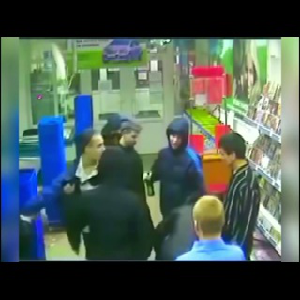

In [ ]:
images = glob.glob('/content/content/train_new/*')
print(images)
print(len(images))

test_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
test_data /= 255


array_to_img(test_data[5])


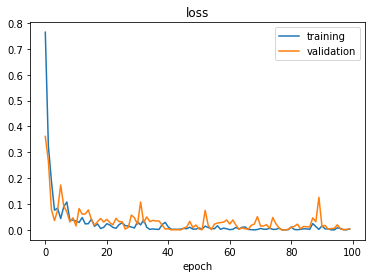

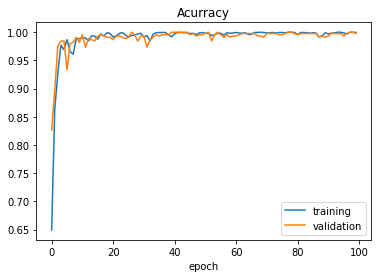

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
# score =history.evaluate(X_test,y_test,verbose=0)
# # print('Test Score:',score[0])
# print('Test Accuracy:',score[1])
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 9 * 9, 512)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

In [ ]:

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 9 * 9, 512)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [ ]:
prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 9 * 9, 512)
prediction = model.predict_classes(prediction_images)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:

print(prediction)
print(test_labels)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [ ]:
confusion_matrix=metrics.confusion_matrix(test_labels,prediction)
confusion_matrix

array([[1833,    3],
       [   8,  227]])

In [ ]:
auc_roc=metrics.roc_auc_score(test_labels,prediction)
auc_roc

0.982161729940203

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels,prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.982161729940203

Text(0.5, 0, 'False Positive Rate')

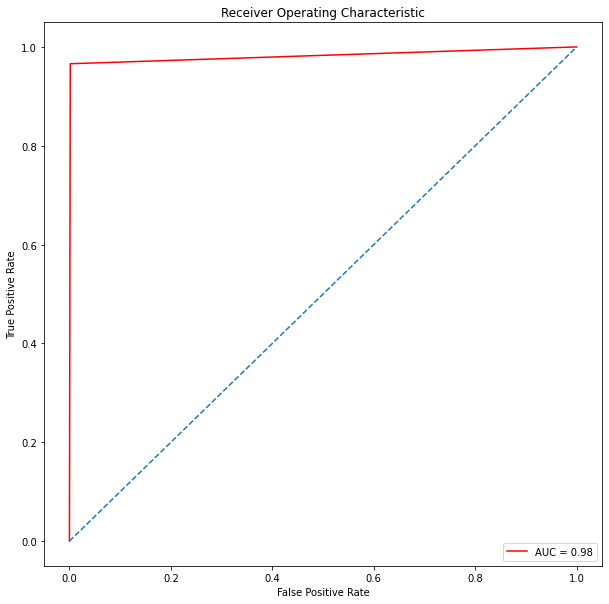

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

99.46885562530179

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,prediction)

array([[1833,    3],
       [   8,  227]])

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(test_labels,prediction)

0.9537815126050421

In [ ]:
from sklearn.metrics import *
print(f1_score(test_labels,prediction, average='macro'))
print(f1_score(test_labels,prediction, average='micro'))
print(f1_score(test_labels,prediction, average=None))
print(cohen_kappa_score(test_labels,prediction,weights='quadratic'))
print(matthews_corrcoef(test_labels,prediction))



0.9866762584037361
0.9946885562530179
[0.99700843 0.97634409]
0.9733529064292942
0.9734243137035729


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Abnormal']
print(classification_report(test_labels,prediction, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1836
    Abnormal       0.99      0.97      0.98       235

    accuracy                           0.99      2071
   macro avg       0.99      0.98      0.99      2071
weighted avg       0.99      0.99      0.99      2071



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(prediction, test_labels, pos_label=2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [ ]:
hinge_loss(test_labels,prediction)

0.8918396909705456

In [ ]:
log_loss(test_labels,prediction) #0.06671091451924945

0.18345192618846454

In [ ]:
fbeta_score(test_labels,prediction, average='macro', beta=0.5)

0.9894398174289478

In [ ]:
fbeta_score(test_labels,prediction, average='micro', beta=0.5)

0.994688556253018

In [ ]:
 fbeta_score(test_labels,prediction, average='weighted', beta=0.5)

0.9946624593539547

In [ ]:
recall_score(test_labels,prediction, average='macro')

0.982161729940203

In [ ]:
 mean_absolute_error(test_labels,prediction)

0.005311443746982134

In [ ]:
mean_squared_error(test_labels,prediction)

0.005311443746982134

In [ ]:
zero_one_loss(test_labels,prediction)

0.005311443746982114

In [ ]:
hamming_loss(test_labels,prediction)

0.005311443746982134

In [ ]:
def adjusted_classes(y_train_scores, t):
    """
    Adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_train_scores]

In [ ]:
def precision_recall_threshold(y_true, y_scores, precisions, recalls, thresholds, t):
    """
    Plots the precision recall curve and shows the current value for each
    at the classifier's threshold (t).
    """
    # Generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    
    y_pred = adjusted_classes(y_scores, t)
    
    print('\n')
    print('Decision threshold = {0:.4f}'.format(t))
    
    print('\n')
    print(pd.DataFrame(confusion_matrix(y_true, y_pred), 
                       columns=['Predicted Survived = 0', 'Predicted Survived = 1'],
                       index=['Actual Survived = 0', 'Actual Survived = 1']))
    
    print('\n')
    print(classification_report(y_true=y_true, y_pred=y_pred, digits=4))
    
    print('\n')
    print("Precision = {0:.4f}".format(precision_score(y_true, y_pred, pos_label=1, average='binary')))
    print("Recall = {0:.4f}".format(recall_score(y_true, y_pred, pos_label=1, average='binary')))
    print("Accuracy = {0:.4f}".format(accuracy_score(y_true, y_pred)))
    print("F1 score = {0:.4f}".format(f1_score(y_true, y_pred, pos_label=1, average='binary')))
    
    print('\n')
    
    recall_at_threshold = recalls[np.argmin(thresholds <= t)]
    precision_at_threshold = precisions[np.argmin(thresholds <= t)]
    
    print('Threshold', np.round(t, 4), 'achieves', np.round(recall_at_threshold, 4), 'recall and', np.round(precision_at_threshold, 4), 'precision')
    print('\n')
    
    # Plot the curve
    plt.figure(figsize=(8,8))
    plt.title('Precision and recall curve\nCurrent threshold set at '+str(np.round(t, 3)), fontsize=16)
    plt.plot(recalls, precisions, color='black', linestyle='-', linewidth=2)
    plt.grid(True)
    plt.ylim(top=1.05)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlim(0, 1)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    
    # Plot the current threshold on the line
    plt.plot([recall_at_threshold, 0], [precision_at_threshold, precision_at_threshold], "r:")                            
    plt.plot([recall_at_threshold, recall_at_threshold], [0, precision_at_threshold], "r:")
    plt.plot([recall_at_threshold], [precision_at_threshold], "ro")                                         
    

In [ ]:
p_train, r_train, thresholds_train = precision_recall_curve(test_labels,prediction)



Decision threshold = 0.4190


                     Predicted Survived = 0  Predicted Survived = 1
Actual Survived = 0                    1833                       3
Actual Survived = 1                       8                     227


              precision    recall  f1-score   support

           0     0.9957    0.9984    0.9970      1836
           1     0.9870    0.9660    0.9763       235

    accuracy                         0.9947      2071
   macro avg     0.9913    0.9822    0.9867      2071
weighted avg     0.9947    0.9947    0.9947      2071



Precision = 0.9870
Recall = 0.9660
Accuracy = 0.9947
F1 score = 0.9763


Threshold 0.419 achieves 0.966 recall and 0.987 precision




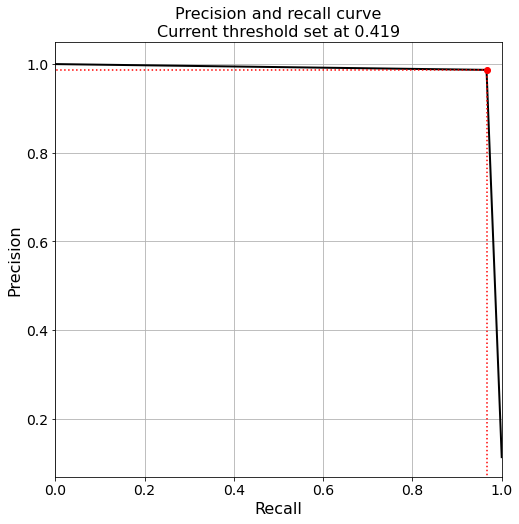

In [ ]:
 precision_recall_threshold(test_labels,prediction, p_train, r_train, thresholds_train, t=0.419)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, t):
    """
    Plots precision and recall scores as a function of the decision threshold
    """
    recall_at_threshold = recalls[np.argmin(thresholds <= t)]
    precision_at_threshold = precisions[np.argmin(thresholds <= t)]
    
    print('Threshold', np.round(t, 4), 'achieves', np.round(recall_at_threshold, 4), 'recall and', np.round(precision_at_threshold, 4), 'precision')
    print('\n')
    
    plt.figure(figsize=(8, 8))
    plt.title("Precision and recall scores as a function of the decision threshold\nCurrent threshold set at "+str(np.round(t, 3)), fontsize=16)
    plt.plot(thresholds, precisions[:-1], color="blue", linestyle="-", linewidth=2, label="Precision")
    plt.plot(thresholds, recalls[:-1], color="green", linestyle="-", linewidth=2, label="Recall")
    plt.ylabel("Score", fontsize=16)
    plt.xlabel("Decision Threshold", fontsize=16)
    plt.ylim(top=1.05)
    plt.xlim(left=0.1)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)  
    plt.grid(True)
    plt.legend(loc='best', fontsize=16)
    plt.plot([t, t], [0., recall_at_threshold], "r:")
    plt.plot([0, t], [precision_at_threshold, precision_at_threshold], "r:")                            
    plt.plot([0, t], [recall_at_threshold, recall_at_threshold], "r:")
    plt.plot([t], [precision_at_threshold], "ro")                                         
    plt.plot([t], [recall_at_threshold], "ro")                             
   

Threshold 0.419 achieves 0.966 recall and 0.987 precision




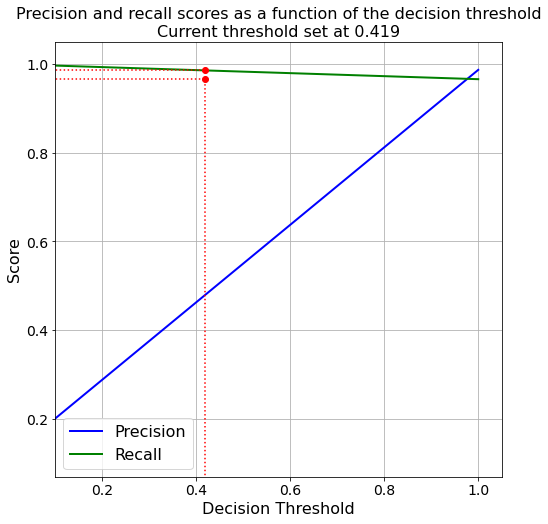

In [ ]:
plot_precision_recall_vs_threshold(p_train, r_train, thresholds_train, t=0.419)


In [ ]:
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
test_labels

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame({"name1" : prediction, "name2" : test_labels})
df.to_csv("VGG19.csv", index=False)

In [ ]:
import csv

with open('/content/VGG19.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

print(data)

[['name1', 'name2'], ['0', '0'], ['0', '0'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '1'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['1', '1'], ['0', '0'], ['0', '0'], ['1', '1'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['1', '1'], ['1', '1'], ['0', '0'], ['1', '1'], ['0', '0'], ['1', '1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '1'], ['0', '0'], ['0', '

In [ ]:
from numpy import genfromtxt
my_data = genfromtxt('/content/VGG19.csv', delimiter=',')

In [ ]:
import pandas as pd 
myFile = pd.read_csv('/content/VGG19.csv', sep=',')

In [ ]:
myFile.name1.to_frame()

,name1
0,0
1,0
2,1
3,0
4,0
...,...
2066,0
2067,1
2068,0
2069,0


In [ ]:
myFile.name1

0       0
1       0
2       1
3       0
4       0
       ..
2066    0
2067    1
2068    0
2069    0
2070    0
Name: name1, Length: 2071, dtype: int64

In [ ]:
log_loss(myFile.name1,myFile.name2)

0.08338864314906153

In [ ]:
!cp -r /content/drive/MyDrive/Anomaly-Videos-Part-1/Arrest /content

In [ ]:
classes = ['Normal','Abnormal']
def frames_extraction(video_path):
    frames_list = []
     
    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable 
    count = 1
 
    while count <= seq_len: 
         
        success, image = vidObj.read() 
        if success:
            image = cv2.resize(image, (img_height, img_width))
            frames_list.append(image)
            count += 1
        else:
            print("Defected frame")
            break
 
            
    return frames_list
 
def create_data(input_dir):
    X = []
    Y = []
     
    classes_list = os.listdir(input_dir)
     
    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list:
           frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
           if len(frames) == seq_len:
             X.append(frames)
             
             y = [0]*len(classes)
             y[classes.index(c)] = 1
             Y.append(y)
     
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y

data_dir = "/content/s"

In [ ]:
!wget https://www.dropbox.com/sh/75v5ehq4cdg5g5g/AACeDPUxpB6sY2jKgLGzaEdra/Testing_Normal_Videos.zip?dl=0
!unzip /content/Testing_Normal_Videos.zip?dl=0
!rm -rf /content/Testing_Normal_Videos.zip?dl=0

--2021-05-30 17:44:52--  https://www.dropbox.com/sh/75v5ehq4cdg5g5g/AACeDPUxpB6sY2jKgLGzaEdra/Testing_Normal_Videos.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/75v5ehq4cdg5g5g/AACeDPUxpB6sY2jKgLGzaEdra/Testing_Normal_Videos.zip [following]
--2021-05-30 17:44:52--  https://www.dropbox.com/sh/raw/75v5ehq4cdg5g5g/AACeDPUxpB6sY2jKgLGzaEdra/Testing_Normal_Videos.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9fbb3b307dfa32d10ba0c9fb1b.dl.dropboxusercontent.com/cd/0/inline/BPcghbHhGb9X9sGLbYrmbTY4L1Nkdt_nX_zGacxymSQdO_OsDGokYi2esjJQ-5-_tKFpXPtrDukrbqRxY8Ms4qcIwMl0VdWcTqZCSkqFYe1YwFbylH5h6CEyWUdQNLLixucV-PZahLW6kfyP9uY_ECNp/file# [following]
--2021-05-30 17:44:52--  https://uc9fbb3b307dfa32d10ba0c9fb1b.dl.

In [ ]:
from random import sample

files = os.listdir('/content/Testing_Normal_Videos_Anomaly')
for file in sample(files,10):
    os.remove('/content/Testing_Normal_Videos_Anomaly/' + file)


In [ ]:
classes = ['Normal', 'Abnormal']

In [ ]:
img_height , img_width = 64, 64
seq_len = 70    

In [ ]:
data_dir = "/content/s"
X, Y = create_data(data_dir)
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, shuffle=True, random_state=0)
 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

FileNotFoundError: ignored

In [ ]:
prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0],9 * 9, 512)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


99.46885562530179

In [ ]:
pred_prob1 = model.predict_proba(prediction_images)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(test_labels, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_labels, pred_prob1[:,1])
auc_score1

0.9998632549946692

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='VGG19')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();